
## Project 4: Churn Prediction Modelling 

---

__Background:__ For subscription-based telecom providers, retaining customers is a significant priority. Retained customers become more loyal to your service, and provide opportunities for up-selling and cross-promotion.

A Telecoms company with a client base in America has collected data on a selection of its clients (anonymised), focused on customers phone activity and whether they chose to leave their account. They wish to know whether a customer is likely to leave their subscription service, i.e. whether a given customer will churn or not.

__Problem Statement:__ Predict Customer churn, and determine the factors that lead customers to churn, in order to optimise the customer management process, giving us insights into customer retention, increasing lifetime value per customer, and identifying customers with further potential to market to.

__Project Goal:__ Predict whether a customer will churn from the Telecom company's services.

__Null Hypothesis:__ Customer churn is unaffected by independent variables, which present as random chance. Therefore, the probability of a customer churning is 50%.

__H0:__ P = 0.5, +/- 0.05

__Alternate Hypothesis:__ A customer’s chance of churning is affected by an independent variable, resulting in a higher or lower-than-equal probability of a customer churning ('True'). 

__H1:__ P =\= 0.5 +/- 0.05

__Limitations:__ Other factors aside from the phone use data may have contributed to the decision to churn, such as other plan features (e.g. internet use and cost within customers' plans) or reliability metrics (number of service outages etc). Also, we have no data on the nature of the customer service calls, and whether these resulted in a positive or negative experience.

### Data - Features and Target

In our dataset, we have 20 features that describe how a customer uses their telecom package, as well as a target feature indicating whether the customer churned. These features are described below:

1. __state (Categorical, 51 unique values):__ name of state that customer resides in
2. __account_length (integer):__ number of days customer has held their account.
3. __area_code (categorical, 3 unique values):__ 3-digit area code of customer
4. __phone_number (categorical, 5000 unique values):__ phone number of customer
5. __international_plan (categorical, 'Yes' or 'No'):__ whether the customer has an international plan
6. __voice_mail_plan (categorical, 'Yes' or 'No'):__ whether the customer has voice mail plan
7. __num_of_voice_mail_messages (integer):__  number of VM messages made by customer
8. __total_day_minutes (integer):__ Total daytime call minutes used
9. __total_day_calls (integer):__ Total daytime calls made
10. __total_day_charge (float):__ Total charges for daytime calls
11. __total_eve_minutes (integer):__ Total evening call minutes used
12. __total_eve_calls (integer):__ Total evening calls made
13. __total_eve_charge (float):__ Total charges for evening calls
14. __total_night_minutes (integer):__ Total nighttime call minutes used
15. __total_night_calls (integer):__ Total nighttime calls made
16. __total_night_charge (float):__  Total charges for evening calls
17. __total_international_minutes (integer):__ Total international minutes used
18. __total_intl_calls (integer):__ Total international calls made
19. __total_intl_charge (float):__ total charges international calls
20. __number_customer_service_calls (integer):__ calls made to customer service

We also have a target column:

21. __churn (Binary Target Column, 'True' or 'False')__ : whether the customer churned or not (True for churned, False for not churned. 



### __Process:__
In tackling the problem statement of predicting churn, we wish to address the following :

> A.	Create an accurate machine learning model for predicting churn likelihood for a given customer, provided the data for that customer is available.

> B. Determine the most important data features that influence customer churn rate, and therefore optimise our model(s).

Our main business problem is a binary classification problem, in that we're interested in whether a customer falls into one of two categories: whether they churn (1) or don't churn (0)

I will attempt to answer these two problems through the following methodology:

1. Explore the telecom customer dataset, to determine its general characteristics
2. Clean and prepare the data to ensure we can utilise as much information from it as possible.
3. Fit a classification ML model with our dataset, and determine if its accuracy eclipses our baseline accuracy (0.5)
4. Utilise various classification models that determine which features are most important to predicting churn
5. Refit model after removing highlighted features (if any) and measure performance
6. Test other classification models to see if they can improve accuracy.

### Success Metrics:

I will be using two main metrics to evaluate model effectiveness, __Accuracy Score__ and __Area Under Curve (AUC)__

While both are useful metrics, I will be placing more weight on a model's AUC, as it tests the discrimination ability of the model rather than its calibration, which the accuracy score does. While optimising a model requires calibration (to ensure predicted outcomes match actual outcomes), if it has no ability to discriminate beyond the proportion of recorded outcomes in the data, it isn't of much use.

Final evaluation of all models will be a visual comparison of ROC curve, with AUC stated beside.


### Pre-step: Additional Data preparation

Previously, we performed Exploratory Data Analysis on our data, and converted all columns to numeric values for compatability with scikit-learn. The EDA report can be found here:

https://github.com/RhysZH/GA-DAT9-Projects1/blob/master/R_Morgan_Project4_Files/Project%204%20-%20Telco%20Data%20EDA.ipynb

In the Exploratory data analysis of the Telecom customer data, we found the following key observations:

1. Our 3 'Total_X_minutes' features showed strong positive correlation with 'total_XXX_charge' features. Therefore, I removed the 'minutes' features to eliminate correlating features.


2. Once we converted categorical features to numerical features (through dummy variables and ordinal replacement values), there is a discrepancy in the scaling of each feature. We therefore need to scale our features using __StandardScaler__.


3. Our target feature ('churn') was heavily imbalanced, in that there were far more customers who did not churn vs those who did. We therefore have to re-sample our data so that both '1' and '0' classes are equally represented in the data. We can accomplish this through __SMOTE-Tomek__.

### Upload Cleaned Data - Scale and Re-sample

In [1]:
import pandas as pd

data = r"https://raw.githubusercontent.com/RhysZH/GA-DAT9-Projects1/master/R_Morgan_Project4_Files/telecom_data.csv"
#data = r"/Users/meisan/Documents/GitHub/GA-DAT9-Projects1/R_Morgan_Project4_Files/telecom_data.csv"
df = pd.read_csv(data)

#Show 1st five rows to perform cursory check for anomalies in values & shape.
df.head()

,account_length,num_of_voice_mail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_n,voice_mail_plan_n,area_code_408,area_code_415,area_code_510,churn_n
0,128,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0,1,0,1,0,0
1,107,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0,1,0,1,0,0
2,137,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,0,0,1,0,0
3,84,0,71,50.90,88,5.26,89,8.86,7,1.78,2,1,0,1,0,0,0
4,75,0,113,28.34,122,12.61,121,8.41,3,2.73,3,1,0,0,1,0,0


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

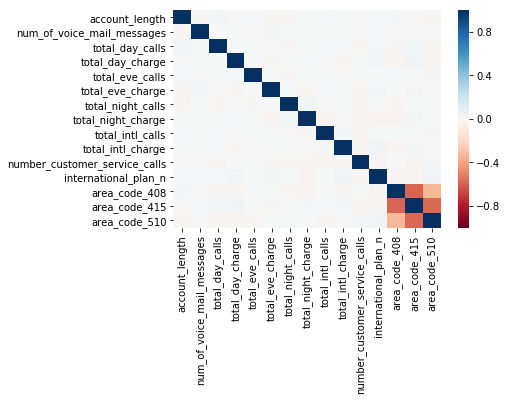

In [3]:
#establish list of features saved from EDA, print heatmap to check for colinearity between features
feature_names = ['account_length','num_of_voice_mail_messages','total_day_calls','total_day_charge',
                 'total_eve_calls','total_eve_charge','total_night_calls','total_night_charge',
                 'total_intl_calls','total_intl_charge','number_customer_service_calls','international_plan_n',
                 'area_code_408','area_code_415','area_code_510']

predictors = ['account_length','total_intl_charge','number_customer_service_calls',
              'total_day_calls','area_code_408','area_code_415','area_code_510']

X = df[feature_names]
y = df['churn_n']

sns.heatmap(X.corr(),vmin=-1,vmax=1,center=0,cmap='RdBu')

In [4]:
from sklearn.preprocessing import StandardScaler

#Instantiate a StandardScaler Object
ss = StandardScaler()

# use the "fit_transform" function to standardize the X design matrix
Xs = ss.fit_transform(X)

#### Use Smote-Tomek to resample data

In [40]:
#import counter to check shapes of original and resampled datasets
from collections import Counter
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=123)
X_res, y_res = smt.fit_sample(Xs, y)


#Compare distributions of old and new datasets.
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

#default settings resulted in heavy use of SMOTE to balance data.

Original dataset shape Counter({0: 4293, 1: 707})
Resampled dataset shape Counter({0: 4292, 1: 4292})


In [ ]:
#
X_samp = pd.DataFrame(X_res, columns = feature_names)
y_samp = pd.DataFrame(y_res, columns = ['churn_n'])

In [39]:
X_samp.shape

(8584, 15)

We notice that after re-sampling, the number of rows in the data has increased. This is because SMOTE-Tomek heavily favoured SMOTE, which creates new estimated data points to bring the number of churned customers (y='1') up to the number of unchurned customers (y=0).

In [6]:
X_samp.head()

,account_length,num_of_voice_mail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_n,area_code_408,area_code_415,area_code_510
0,0.698941,1.273145,0.502824,1.574074,-0.060077,-0.063849,-0.446928,0.876286,-0.584236,-0.095509,-0.436676,-0.323240,-0.580122,1.002002,-0.576119
1,0.169849,1.346973,1.158422,-0.347082,0.141693,-0.101089,0.154374,1.069818,-0.584236,1.245982,-0.436676,-0.323240,-0.580122,1.002002,-0.576119
2,0.925695,-0.572549,0.704546,1.171286,0.494791,-1.572084,0.204483,-0.746737,0.229917,0.695971,-1.202236,-0.323240,-0.580122,1.002002,-0.576119
3,-0.409634,-0.572549,-1.463971,2.210457,-0.614946,-2.745155,-0.547145,-0.069377,1.044069,-1.329681,0.328885,3.093675,1.723777,-0.998002,-0.576119
4,-0.636388,-0.572549,0.654116,-0.252115,1.100103,-1.034426,1.056327,-0.267307,-0.584236,-0.055264,1.094445,3.093675,-0.580122,1.002002,-0.576119


Next, we will create another correlation heatmap to check if re-sampling affected inter-feature colinearity, requiring further cleaning (from the heatmap, this is not the case).

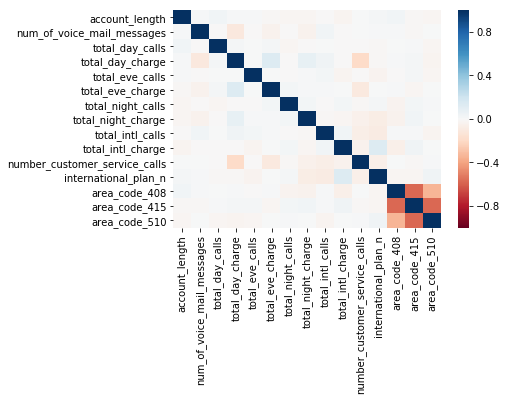

In [7]:
#check to see if sampling has affected colinearity.
sns.heatmap(X_samp.corr(),vmin=-1,vmax=1,center=0,cmap='RdBu')

## Model Selection

In choosing Machine Learning Models to answer our two main business problems (of predicting churn, and determining influential features for prediction), it is select models that can accomplish one or both of these tasks specifically. The following are models I will be using for each task.

__Classifcation Models__

1. Logistic Regression Model
2. K-Nearest Neighbours
3. Decision Trees


__Classification Models with Feature Selection capabilities__

1. SGDClassifier (Regularisation), 
2. Random Forest Model

For feature selection models, I will re-fit the logistic regression model after removing highlighted features, to see if success metrics are improved.

### 1. Logisitic Regression Modelling

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# create training and testing vars, check shape
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2,random_state=123)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(6867, 15) (6867,)
(1717, 15) (1717,)


In [9]:
# Make an instance of a Logistic Regression object.
lr = LogisticRegression()
type(lr)

sklearn.linear_model.logistic.LogisticRegression

In [10]:
#fit model, print coefficients
model = lr.fit(X_train, y_train)
print(lr.intercept_)
print(lr.coef_)

[-0.68334051]
[[ 0.06034927 -0.46044573  0.04311776  0.77387899 -0.01223031  0.43202967
  -0.06308781  0.25381826 -0.1568363   0.23789095  0.87602113  0.71344466
   0.02847505 -0.03032511  0.00648021]]


In [11]:
print(feature_names[3],',',feature_names[10],',',feature_names[11])

total_day_charge , number_customer_service_calls , international_plan_n


From an initial viewing, the above metrics have higher coefficients associated with them. 

In [12]:
#assign array with predicted 'y' results to 'y_predicted'
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [13]:
from sklearn import metrics

# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.8555217146998706

In [14]:
y_pred_train = model.predict(X_train)
print('Logistic Regression Testing Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Logistic Regression Accuracy:',metrics.accuracy_score(y_train, y_pred_train))
print('---Confusion Matrix---')
print(metrics.confusion_matrix(y_true=y_test, y_pred=preds > .5))

Logistic Regression Testing Accuracy: 0.7815958066394875
Logistic Regression Accuracy: 0.7849133537206932
---Confusion Matrix---
[[660 183]
 [192 682]]


> Scores are close, indicating model is not overfitted.

### 2. Elastic Net Regularisation

In [15]:
#define a range of alphas for optimising enet
alpha_range = 10.**np.arange(-2, 3)
alpha_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [16]:
from sklearn.linear_model import SGDClassifier

opt_auc = 0
#find optimal auc through optimal alpha, use coefficients for feature selection
for n in alpha_range:
    clf = SGDClassifier(penalty='elasticnet',alpha=n,max_iter=1000, loss = 'log',random_state=123)
    clf_model = clf.fit(X_train, y_train)
    predicted_enet = clf.predict_proba(X_test)
    preds = predicted_enet[:,1]
    fpr_enet, tpr_enet, threshold_enet = metrics.roc_curve(y_test, preds)
    roc_auc_enet = metrics.auc(fpr_enet, tpr_enet)
    #determine the optimum alpha by storing 'n' and its 
    #associated metrics if AUC is larger than AUC for previous n.
    if roc_auc_enet >= opt_auc:
        opt_preds = preds
        opt_auc = roc_auc_enet
        opt_int = clf.intercept_
        opt_coef = clf.coef_
        opt_alpha = n
print('AUC for optimal alpha: ', opt_auc)    
print('Optimal alpha: ', opt_alpha)    
print('Intercept: ', opt_int)
print('coefficients: ',opt_coef)

AUC for optimal alpha:  0.8556031499140859
Optimal alpha:  0.01
Intercept:  [-0.61357972]
coefficients:  [[ 0.04362697 -0.40886348  0.03083594  0.69823179  0.          0.38294732
  -0.0473364   0.22019008 -0.13755107  0.20488582  0.78566804  0.65239969
   0.01523696 -0.02900043  0.        ]]


#### Elastic net feature removal
> elastic net regularisation deprecated the following features:

> __1. 'total_eve_calls'__

> __2. 'area_code_510'__

> We will now use the optimal alpha value of 0.01 to re-fit our model and observe AUC.

In [17]:
clf_2 = SGDClassifier(penalty='elasticnet',alpha=0.01,max_iter=1000, loss = 'log',random_state=123)
clf_model_2 = clf_2.fit(X_train, y_train)
predicted_enet_2 = clf_2.predict_proba(X_test)
print(clf_model_2.intercept_)
print(clf_model_2.coef_)

[-0.61357972]
[[ 0.04362697 -0.40886348  0.03083594  0.69823179  0.          0.38294732
  -0.0473364   0.22019008 -0.13755107  0.20488582  0.78566804  0.65239969
   0.01523696 -0.02900043  0.        ]]


In [18]:
preds = predicted_enet_2[:,1]
fpr_enet_2, tpr_enet_2, threshold_enet_2 = metrics.roc_curve(y_test, preds)
roc_auc_enet_2 = metrics.auc(fpr_enet_2, tpr_enet_2)
roc_auc_enet_2

0.8556031499140859

In [19]:
y_pred = clf_model_2.predict(X_test)
y_pred_train = clf_model_2.predict(X_train)
print('ElasticNet Testing Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('ElasticNet Training Accuracy:',metrics.accuracy_score(y_train, y_pred_train))
print('---Confusion Matrix---')
print(metrics.confusion_matrix(y_true=y_test, y_pred=preds > .5))

ElasticNet Testing Accuracy: 0.7839254513686663
ElasticNet Training Accuracy: 0.7856414737148683
---Confusion Matrix---
[[660 183]
 [188 686]]


### 3. LogReg re-fit (removing features reduced from ENET)

In [20]:
#re-fit model, removing features highlighted from elasticnet


enet_predictors = ['account_length','num_of_voice_mail_messages','total_day_calls','total_day_charge',
                 'total_eve_charge','total_night_calls','total_night_charge',
                 'total_intl_calls','total_intl_charge','number_customer_service_calls','international_plan_n',
                 'area_code_408','area_code_415']
#assign enet predictors to balanced X data
X_samp_f = X_samp[enet_predictors]

#split data
X_train, X_test, y_train, y_test = train_test_split(X_samp_f, y_res, test_size=0.2,random_state=123)


lr = LogisticRegression()
model_2 = lr.fit(X_train, y_train)

#calculate AUC of new model
probs = model_2.predict_proba(X_test)
preds = probs[:,1]
fpr_2, tpr_2, threshold_2 = metrics.roc_curve(y_test, preds)
roc_auc_2 = metrics.auc(fpr_2, tpr_2)
roc_auc_2

0.855561075053408

In [21]:
y_pred = model_2.predict(X_test)
y_pred_train = model_2.predict(X_train)
print('2nd LogReg Testing Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('2nd LogReg Training Accuracy:',metrics.accuracy_score(y_train, y_pred_train))
print('---Confusion Matrix---')
print(metrics.confusion_matrix(y_true=y_test, y_pred=preds > .5))

2nd LogReg Testing Accuracy: 0.7833430401863716
2nd LogReg Training Accuracy: 0.7846221057230232
---Confusion Matrix---
[[662 181]
 [191 683]]


### 4. K-fold cross validation on original LogReg model

no_folds    4.000000
scores      0.785531
Name: 2, dtype: float64


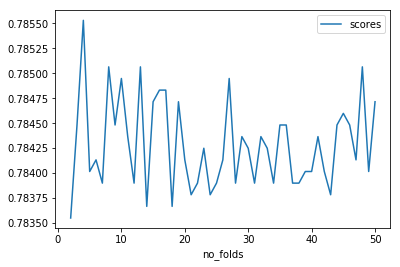

In [22]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

score_list = []
no_folds = []
for n in range(2,51):
    predicted = cross_val_predict(model, X_samp_f, y_res, cv=n)
    score = metrics.accuracy_score(y_res, predicted)
    no_folds.append(n)
    score_list.append(score)

s = {'no_folds':no_folds, 'scores':score_list}
n_scores = pd.DataFrame(s)
print(n_scores.iloc[n_scores['scores'].values.argmax()])
n_scores.plot('no_folds', 'scores')

#### Optimal number of folds is 4. We will use this for final cross-validation.

### 5. KNN Classification 

knn_acc           0.950495
num_neighbours    2.000000
Name: 0, dtype: float64


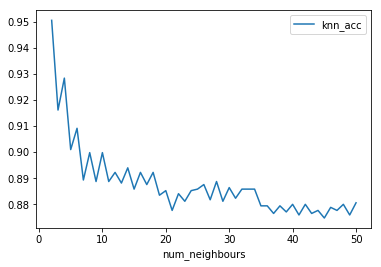

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#looped function for calculating accuracy for various neighbours
knn_acc = []
num_neighbours = []

for n in range(2,51):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn_model = knn.fit(X_train, y_train)
    predicted_knn = knn_model.predict(X_test)
    knn_acc.append(accuracy_score(y_test, predicted_knn))
    num_neighbours.append(n)
    
s = {'knn_acc':knn_acc, 'num_neighbours':num_neighbours}
knn_scores = pd.DataFrame(s)
print(knn_scores.iloc[knn_scores['knn_acc'].values.argmax()])
knn_scores.plot('num_neighbours', 'knn_acc')

#### Optimal number of neigbours is 2. We will use n = 2 for computing ROC & AUC.

In [24]:
knn_13 = KNeighborsClassifier(n_neighbors=2)
knn_model = knn.fit(X_train, y_train)
predicted_knn = knn.predict_proba(X_test)
preds = predicted_knn[:,1]
fpr_knn, tpr_knn, threshold_knn = metrics.roc_curve(y_test, preds)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)
roc_auc_knn

0.9429878851546319

In [25]:
y_pred = knn_model.predict(X_test)
y_pred_train = knn_model.predict(X_train)
print('KNN Testing Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('KNN Training Accuracy:',metrics.accuracy_score(y_train, y_pred_train))
print('---Confusion Matrix---')
print(metrics.confusion_matrix(y_true=y_test, y_pred=preds > .5))

KNN Testing Accuracy: 0.8806057076295865
KNN Training Accuracy: 0.8572884811416922
---Confusion Matrix---
[[708 135]
 [ 70 804]]


### 6. Decision Tree Model

In [26]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
dtree_model = clf_tree.fit(X_train, y_train)
predicted_tree = clf_tree.predict_proba(X_test)
preds = predicted_tree[:,1]
fpr_tree, tpr_tree, threshold_tree = metrics.roc_curve(y_test, preds)
roc_auc_tree = metrics.auc(fpr_tree, tpr_tree)
roc_auc_tree

0.9330534676471466

In [27]:
import graphviz 
dot_data = tree.export_graphviz(dtree_model, out_file=None) 
graph = graphviz.Source(dot_data) 
#graph.render("Telco Churn") 

In [28]:
y_pred = dtree_model.predict(X_test)
y_pred_train = dtree_model.predict(X_train)
print('Decision Tree Testing Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Decision Tree Training Accuracy:',metrics.accuracy_score(y_train, y_pred_train))
print('---Confusion Matrix---')
print(metrics.confusion_matrix(y_true=y_test, y_pred=preds > .5))

Decision Tree Testing Accuracy: 0.9330227140361095
Decision Tree Training Accuracy: 1.0
---Confusion Matrix---
[[788  55]
 [ 60 814]]


### 7-a. Random Forest Model

In [29]:
#split data according to original dataset

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2,random_state=123)

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf_clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_model = rf_clf.fit(X_train,y_train)

rf_pred_prob = rf_model.predict_proba(X_test)
preds = rf_pred_prob[:,1]
fpr_rf, tpr_rf, threshold_rf = metrics.roc_curve(y_test, preds)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)
roc_auc_rf

0.9939296834070322

In [30]:
rf_y_pred = rf_clf.predict(X_test)
rf_pred_train = rf_clf.predict(X_train)
print('RandForest Testing Accuracy:', metrics.accuracy_score(y_test, rf_y_pred))
print('RandForest Training Accuracy:',metrics.accuracy_score(y_train, rf_pred_train))
print('---Confusion Matrix---')
print(metrics.confusion_matrix(y_true=y_test, y_pred=preds > .5))

RandForest Testing Accuracy: 0.9638905066977286
RandForest Training Accuracy: 1.0
---Confusion Matrix---
[[821  22]
 [ 40 834]]


### 7-b. Feature Important from Random Forest

In [31]:
feature_imp = pd.Series(rf_model.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

total_day_charge                 0.218455
number_customer_service_calls    0.178264
international_plan_n             0.103133
total_intl_calls                 0.084248
total_eve_charge                 0.081038
total_intl_charge                0.056927
total_night_charge               0.055314
num_of_voice_mail_messages       0.045131
total_eve_calls                  0.040700
account_length                   0.040627
total_night_calls                0.039512
total_day_calls                  0.038722
area_code_415                    0.006566
area_code_510                    0.006039
area_code_408                    0.005324
dtype: float64

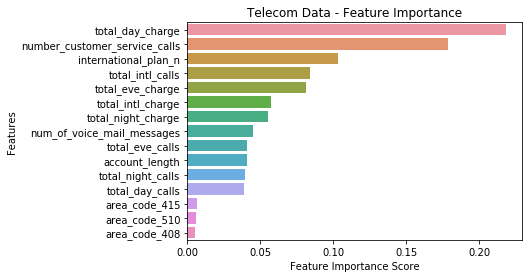

In [32]:
# Creating a bar plot for feature importance
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Telecom Data - Feature Importance")
plt.show()

### 8. Final LogReg Model, removing features below 2% important

In [33]:
#re-fit model, removing features highlighted from elasticnet


rf_predictors = ['account_length','num_of_voice_mail_messages','total_day_calls',
                 'total_day_charge','total_eve_charge','total_night_calls',
                 'total_night_charge','total_intl_calls','total_intl_charge',
                 'number_customer_service_calls','international_plan_n']
#assign RandomForest predictors to balanced X data
X_samp_randf = X_samp[rf_predictors]

#split data
X_train, X_test, y_train, y_test = train_test_split(X_samp_randf, y_res, test_size=0.2,random_state=123)


lr_3 = LogisticRegression()
model_3 = lr_3.fit(X_train, y_train)

#calculate AUC of new model
probs = model_3.predict_proba(X_test)
preds = probs[:,1]
fpr_3, tpr_3, threshold_3 = metrics.roc_curve(y_test, preds)
roc_auc_3 = metrics.auc(fpr_3, tpr_3)
roc_auc_3

0.8559261762638066

In [34]:
y_pred = model_3.predict(X_test)
y_pred_train = model_3.predict(X_train)
print('Final LogReg Testing Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Final LogReg Training Accuracy:',metrics.accuracy_score(y_train, y_pred_train))
print('---Confusion Matrix---')
print(metrics.confusion_matrix(y_true=y_test, y_pred=preds > .5))

Final LogReg Testing Accuracy: 0.7897495631916133
Final LogReg Training Accuracy: 0.7830202417358381
---Confusion Matrix---
[[665 178]
 [183 691]]


### 9. Cross-validate All models

In [35]:
#cross-validate all models with optimal number of folds - 4 folds.
cv_knn = cross_val_score(knn_model, X_res, y_res, cv=4, scoring='roc_auc').mean()
cv_lr = cross_val_score(model, X_res, y_res, cv=4, scoring='roc_auc').mean()
cv_lr_2nd = cross_val_score(model_2, X_samp_f, y_res, cv=4, scoring='roc_auc').mean()
cv_enet = cross_val_score(clf_model_2, X_res, y_res, cv=4, scoring='roc_auc').mean()
cv_dtree = cross_val_score(dtree_model, X_samp_f, y_res, cv=4, scoring='roc_auc').mean()
cv_rf = cross_val_score(rf_model, X_samp_f, y_res, cv=4, scoring='roc_auc').mean()
cv_lr_3rd = cross_val_score(model_3, X_samp_randf, y_res, cv=4, scoring='roc_auc').mean()

print('Cross-validated AUC for KNN model is', cv_knn)
print('Cross-validated AUC for 1st LogReg model is', cv_lr)
print('Cross-validated AUC for Refitted LogReg model is', cv_lr_2nd) 
print('Cross-validated AUC for 2nd ElasticNet model is', cv_enet)
print('Cross-validated AUC for Decision Tree model is', cv_dtree)
print('Cross-validated AUC for Random Forest model is', cv_rf)
print('Cross-validated AUC for Final LogReg is', cv_lr_3rd)

Cross-validated AUC for KNN model is 0.9256208477333586
Cross-validated AUC for 1st LogReg model is 0.8415368239660427
Cross-validated AUC for Refitted LogReg model is 0.841789792491981
Cross-validated AUC for 2nd ElasticNet model is 0.8417226961190067
Cross-validated AUC for Decision Tree model is 0.9123951537744641
Cross-validated AUC for Random Forest model is 0.9935905592580401
Cross-validated AUC for Final LogReg is 0.8418178035991449


### 10. Plot ROC and AUC for all models

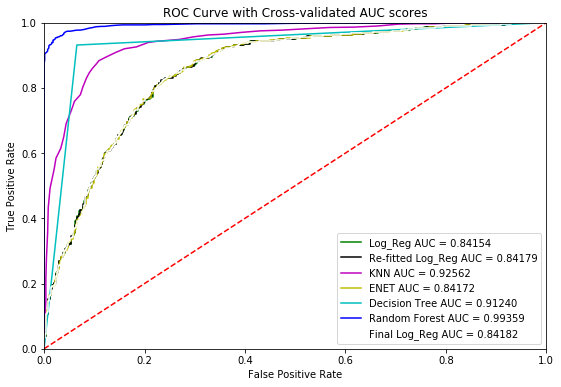

In [36]:
#Plot AUC for all models
fig, ax = plt.subplots(figsize=(9, 6))
plt.title('ROC Curve with Cross-validated AUC scores')
plt.plot(fpr, tpr, 'g', label = 'Log_Reg AUC = %0.5f' % cv_lr)
plt.plot(fpr_2, tpr_2, 'k', label = 'Re-fitted Log_Reg AUC = %0.5f' % cv_lr_2nd)
plt.plot(fpr_knn, tpr_knn, 'm', label = 'KNN AUC = %0.5f' % cv_knn)
plt.plot(fpr_enet_2, tpr_enet_2, 'y', label = 'ENET AUC = %0.5f' % cv_enet)
plt.plot(fpr_tree, tpr_tree, 'c', label = 'Decision Tree AUC = %0.5f' % cv_dtree)
plt.plot(fpr_rf, tpr_rf, 'b', label = 'Random Forest AUC = %0.5f' % cv_rf)
plt.plot(fpr_3, tpr_3, 'w', label = 'Final Log_Reg AUC = %0.5f' % cv_lr_3rd)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

> Observing AUC's of our models, KNN and Decision tree models have better discrimination ability.